Пробуем сделать простое дерево решений и работать с ним

In [1]:
import json
import dtreevoi
import matplotlib.pyplot as plt
import numpy as np

# Задача 1. Принятие решения о покупке месторождения


Вы покупаете месторождение нефти. Известна геологическая оценка извлекаемых запасов:

- p10 - 1 млн тонн нефти
- p50 - 1.1 млн тонн нефти
- p90 - 1.2 млн тонн нефти

Стоимость 1 тонны нефти в запасах – 1 тыс. руб.

Готовы ли купить месторождение за 1.1 млрд.руб? Сколько вы готовы заплатить?

---

## Решение задачи 1
Для решения задачи можно построить дерево решений с использованием [silverdecisions.pl](https://silverdecisions.pl/)

Получится что как на рисунке ниже

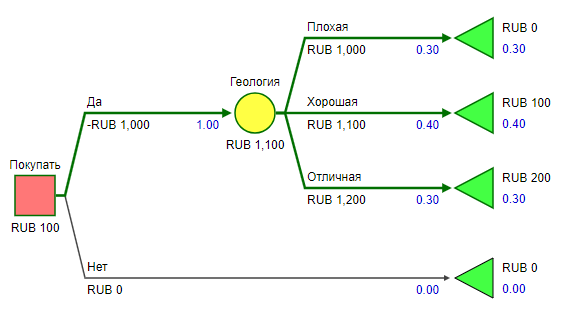

Дерево состоит из одного узла принятия решений (Покупать), одного вероятностного узла (Геология) и трех вариантов исходов для вероятностного узла (Плохая, Хорошая, Отличная). Затраты и выигрыше в дереве приведены в млн.руб. Анализ дерева показывает, что ожидаемая доходной вероятностного узла "Геология" составляет $EMV_{геология}= 1100$ млн.руб.

При построении дерева перцентили p10, p50, p 90 были заменены на вероятности 0.3, 0.4, 0.5 согласно расширенному методу Свенсона Мегилла (Extended Swanson-Megill Method).  (надо добавить ссылку и расширить описание - возможно в виде отдельного ноутбука).

Альтернатива покупке месторождения не приносит ни проигрышей ни выигрышей $EMV_{не покупать}= 1100$ млн.руб.

Таким образом при стоимости месторождении 1 млрд. руб. общая доходность решения покупать $EMV_{покупать}= 100$ млн.руб.  $EMV_{покупать} > EMV_{не_покупать}$ поэтому покупка целесообразна (при условии максимизации доходности как критерия принятия решений).

Для удобства дальшейнего анализа автоматизируем расчет с использованием скриптов python. Для этого зададим дерево в виде словаря и приведем функции расчета дерева и его анализа.

In [2]:
# загрузим дерево из файла tree_1.json
with open('tree_1.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)

In [3]:
# содержимое файла можно распечатать следующей командой
print(json.dumps(tree, indent=4, ensure_ascii=False))

{
    "name": "Покупать",
    "type": "decision",
    "child_edges": [
        {
            "name": "Да",
            "payoff": -1000,
            "child_node": {
                "name": "Геология",
                "type": "chance",
                "child_edges": [
                    {
                        "name": "Плохая",
                        "payoff": 1000,
                        "probability": 0.3,
                        "child_node": {
                            "type": "terminal"
                        }
                    },
                    {
                        "name": "Хорошая",
                        "payoff": 1100,
                        "probability": 0.4,
                        "child_node": {
                            "type": "terminal"
                        }
                    },
                    {
                        "name": "Отличная",
                        "payoff": 1200,
                        "probability": 0.3,
              

Для удобства анализа построим дерево с использованием функции `plot_tree` и библиотеки `matplotlib` 

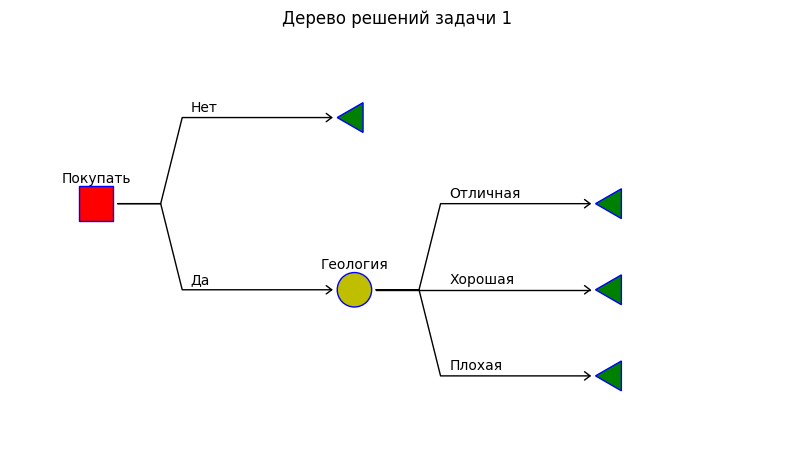

In [4]:
# создадим параметры дерева - размер рисунка
fig, ax = plt.subplots(figsize=(10, 6))
# построим дерево
dtreevoi.plot_tree(tree, ax)
# нарисуем дерево
plt.title('Дерево решений задачи 1')
plt.show()

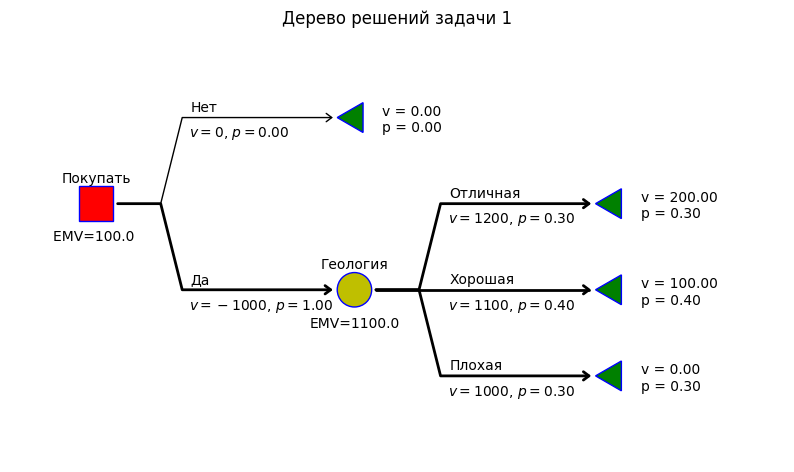

In [5]:
# запуск расчета дерева
dtreevoi.solve_tree(tree)
# нарисуем дерево
fig, ax = plt.subplots(figsize=(10, 6))
dtreevoi.plot_tree(tree, ax, 3, 3)
plt.title('Дерево решений задачи 1')
plt.show()

Видно, что функции решения дерева дают результаты аналогичные дереву построенному в программе [silverdecisions.pl](https://silverdecisions.pl/)

# Задача 2 Ценность информации дополнительных исследований при продаже месторождения

Вы продаете месторождение нефти. Известно, что стоимость месторождения определяется подтвержденными запасами. 
- Текущие извлекаемые запасы – 1 млн тонн нефти
- Стоимость 1 тонны нефти в запасах – 1 тыс. руб.

Проведение исследований на разведочных скважинах, является важным элементом оценки запасов. Вам предлагают провести новый набор исследований, который, возможно, может увеличить величину подтвержденных запасов месторождений. 

- Стоимость исследования 50 млн руб
- Вероятность успешности исследования - получения хоть какой-то информации - 70% 

Ожидаемая информация – фильтрационные параметры пласта, уточнение строение пласта, переоценка геологических и извлекаемых запасов. 

Ожидаемые результаты исследования: 
- увеличение запасов на 15% с вероятностью 30%, 
- запасы не изменятся - с вероятностью 70%. 

Постройте дерево решений и ответьте на вопросы 
1. Стоит ли проводить исследование с представленными данными? 
2. Какова стоимость информации?
3. Какова максимально возможная стоимость исследования при которой оно имеет смысл?
4. Постройте график зависимости ценности информации от вероятности прироста запасов.

---

## Решение задачи 2

Нетрудно оценить, что увеличение запасов на 15% эквивалентно росту стоимости месторождения на 150 млн.руб.
Тогда можно построить следующее дерево решений используя [silverdecisions.pl](https://silverdecisions.pl/).

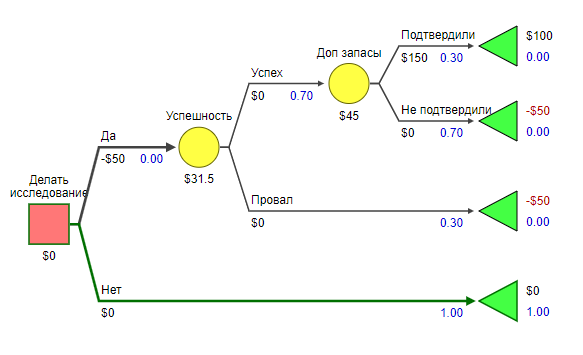


Или загрузить дерево решений в библиотеку `dtreevoi`

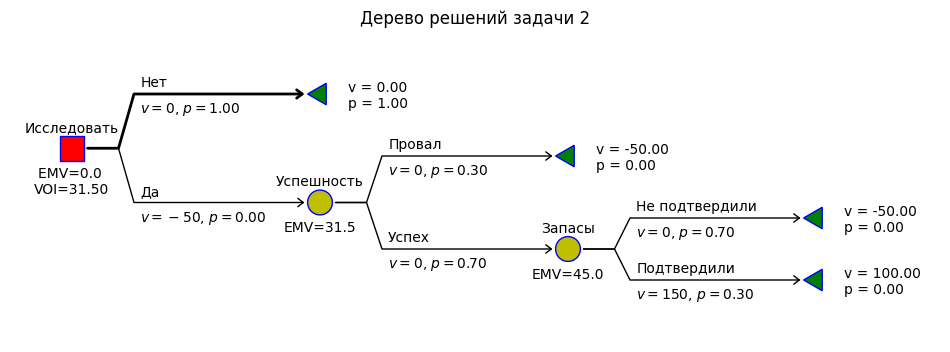

In [6]:
# загрузим дерево из файла tree_2.json
with open('tree_2.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)
# запуск расчета дерева
dtreevoi.solve_tree(tree)
# нарисуем дерево
fig, ax = plt.subplots(figsize=(12, 6))
dtreevoi.plot_tree(tree, ax, 4, 3)
plt.title('Дерево решений задачи 2')
plt.show()

Ключевые результаты расчета загружаеются в корень дерева по ключам `emv` и `voi`. После расчета можно получить к ним доступ

In [7]:
# пример чтения результатов расчета дерева из корневого узла
print(f" EMV = {tree['emv']:.2f}")
print(f" VOI = {tree['voi']:.2f}")

 EMV = 0.00
 VOI = 31.50


Возможность чтения результатов расчета можно использовать для проведения анализа чувствительности. Например далее строится и анализируется зависимость ценности информации для задачи 2 от вероятности успешности прироста запасов. Для этого вероятности напрямую записываются в структуру дерева. При этом учитывается, что сумма вероятностей всех ветвей вероятностного узла должна быь равна единице.

In [8]:
def tree_2(tree, prob_reserves_increase:float=0.3):
    """
    функция модификации дерева решения задачи 2 с новыми вероятностями успеха прироста запасов
    """
    tr = tree.copy()
    tr['child_edges'][0]['child_node']['child_edges'][0]['child_node']['child_edges'][0]['probability'] = prob_reserves_increase
    tr['child_edges'][0]['child_node']['child_edges'][0]['child_node']['child_edges'][1]['probability'] = 1 - prob_reserves_increase
    dtreevoi.solve_tree(tr)    
    
    return tr

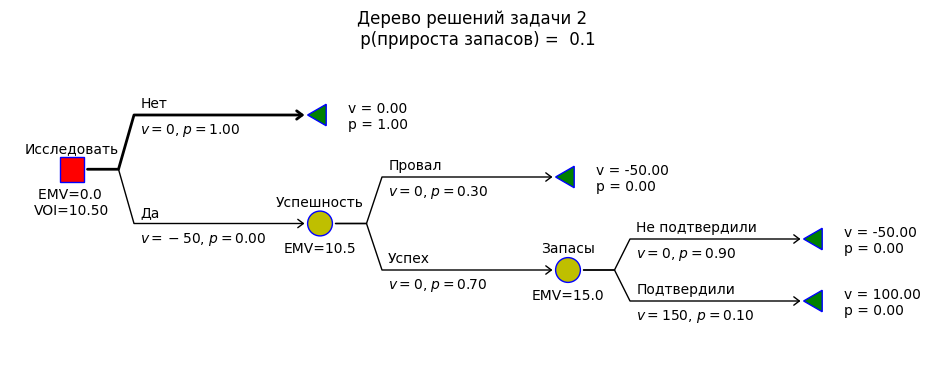

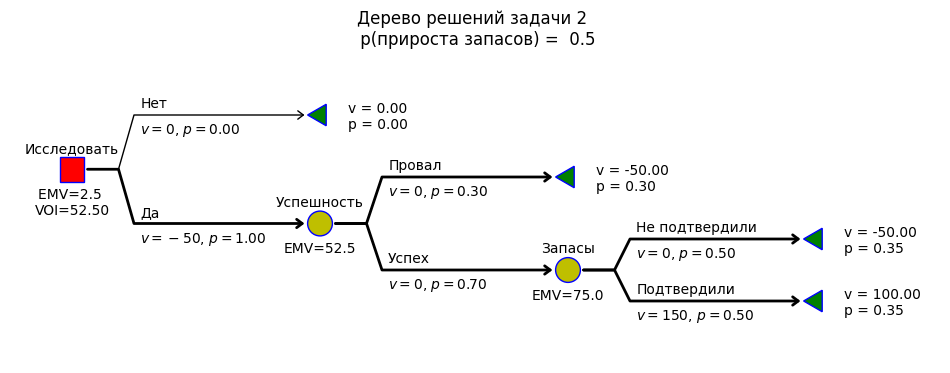

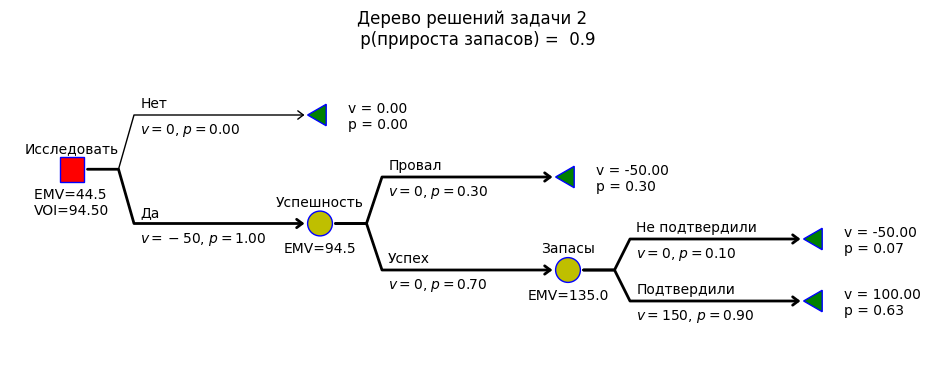

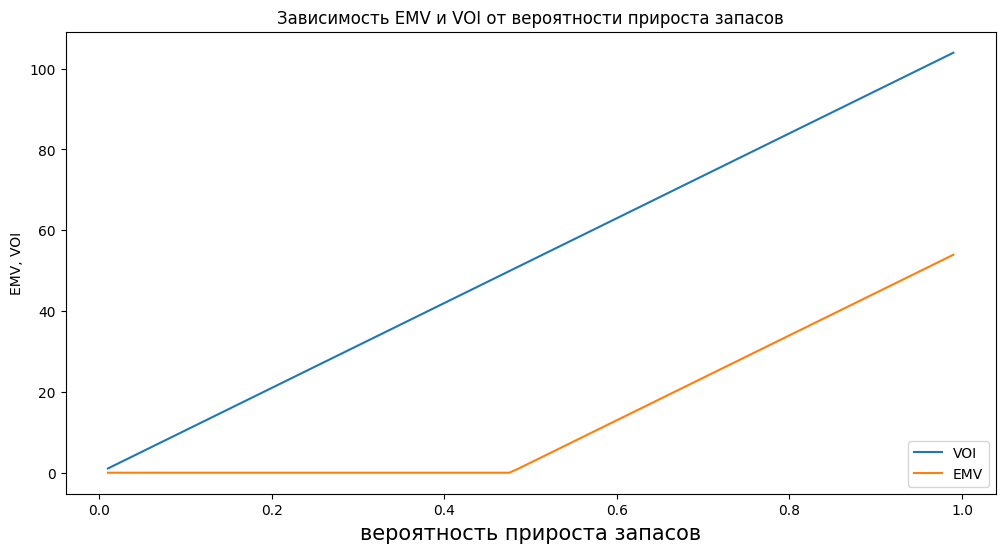

In [9]:
# построим деревья решений для трех значений вероятности успеха
pr_list = [0.1, 0.5, 0.9]
emv_list =[]
voi_list = []
for pr in pr_list:
    tr = tree_2(tree, pr)
    fig, ax = plt.subplots(figsize=(12, 6))
    dtreevoi.plot_tree(tr, ax, 4, 3)
    plt.title(f'Дерево решений задачи 2 \n p(прироста запасов) =  {pr}')
    plt.show()

# нарисуем график зависимости VOI и EMV от вероятности успеха
# для этого используем массив из 100 значений вероятностей
pr_list = np.linspace(0.01, 0.99, 100)
emv_list =[]
voi_list = []
for pr in pr_list:
    tr = tree_2(tree, pr)
    emv_list.append(tr['emv'])
    voi_list.append(tr['voi'])
    
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(pr_list, voi_list, label='VOI')
plt.plot(pr_list, emv_list, label='EMV')

# наведем красоту с графиками
plt.legend(loc='lower right')
plt.title('Зависимость EMV и VOI от вероятности прироста запасов')

ax.set_xlabel(r'вероятность прироста запасов', fontsize=15)
ax.set_ylabel(r'EMV, VOI')
plt.show()

# Задача 3

Вы эксплуатируете месторождение нефти. У вас есть добывающая скважина, которая уже отлично работает. Но вам кажется, что она может работать лучше. По опыту эксплуатации скважин-аналогов вы подозреваете наличие положительного скин-фактора, который можно удалить кислотной обработкой.

Скважина дает 40 т/сут (стоимость нефти 10 тыс.руб./т). Скин-фактор S неизвестен.

Стоимость идеального ГДИС - КВД 1 млн.руб. Стоимость ОПЗ 1 млн. руб. Снижает скин в 2 раза. Эффект длится 1 год.

Априорная информация:

- S = 14 вероятность 50%
- S = 7 вероятность 20%
- S = 0 вероятность 30%

Что делать? Какова стоимость информации для КВД в данных условиях. Какие параметры влияют на стоимость информации. Что надо изменить в условиях чтобы оправдать проведение более дорогих исследований?

---


В отличии от предыдущих задач для расчета денежных эффектов на основе изменения скин-фактора скважины требуются инженерные расчеты. В данной задаче они просты, но в реальных задачах могут быть более сложными.

По формуле Дюпюи для псевдо-установившегося радиального притока к скважине можно оценить дебит скважины:
$$Q = \frac{kh}{18.41 \mu B} \frac{P_{res} - P_{wf}}{ \ln \dfrac{r_e}{r_w} - \dfrac{3}{4} + S } \tag{1}$$

где 
- $Q$ - дебит жидкости в стандартных условиях, м$^3$/сут
- $k$ - эффективная проницаемость пласта, мД
- $h$ - эффективная мощность пласта, м
- $\mu$ - вязкость нефти, сП
- $B$ - объемный коэффициент нефти, м$^3$/м$^3$
- $P_{res}$ - среднее пластовое давление в конечной области дренирования
- $P_{wf}$ - забойное давление
- $r_e$ - радиус области дренирования
- $r_w$ - радиус скважины
- $S$ - скин-фактор

Нас интересует отношение дебитов скважины до и после обработки призабойной зоны. Будет значения до обозначать индексом 1, значения после индексом 2. 

$$\frac{Q_1}{Q_2} = \frac{\ln \dfrac{r_e}{r_w} - \dfrac{3}{4} + S_2}{\ln \dfrac{r_e}{r_w} - \dfrac{3}{4} + S_1} \tag{2}$$

Видно что кратность прироста зависит только от скин-фактора и размеров области дренирования. 
Причем характерный параметр области дренирования $\ln \dfrac{r_e}{r_w}- \dfrac{3}{4}$ меняется слабо и может быть для грубых оценок принят равным 7.

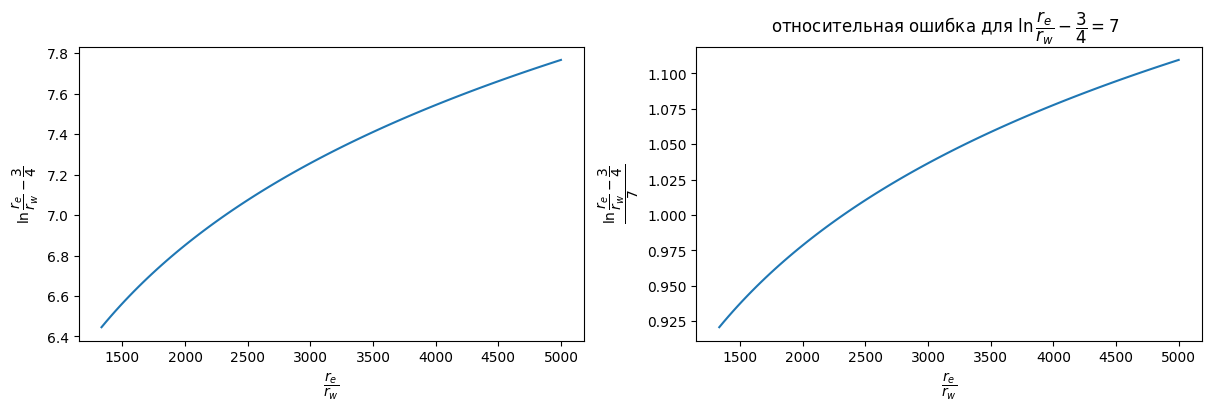

In [10]:
def ln_re_rw(re_rw):
    return np.log(re_rw)-0.75
rerw_list = np.linspace(200/0.15, 500/0.1, 100)

fig, ax = plt.subplots(1,2,figsize=(12, 4), layout='constrained')
ax[0].plot(rerw_list, ln_re_rw(rerw_list))
ax[1].plot(rerw_list, ln_re_rw(rerw_list)/7)
ax[0].set_xlabel('$\\dfrac{r_e}{r_w}$')
ax[0].set_ylabel('$\\ln \\dfrac{r_e}{r_w}- \\dfrac{3}{4}$')
ax[1].set_xlabel('$\\dfrac{r_e}{r_w}$')
ax[1].set_ylabel('$\\dfrac{ \\ln \\dfrac{r_e}{r_w}- \\dfrac{3}{4} }{7}$')
ax[1].set_title('относительная ошибка для $\\ln \\dfrac{r_e}{r_w}- \\dfrac{3}{4} = 7$  ')
plt.show()

теперь можно оценить изменения дебита скважины при снижении скин-фактора из за ОПЗ.

In [11]:
def q_increment(q_base, s1, s2):
    return q_base*(7 + s1)/(7 + s2) - q_base
def money_increment(dq, qprice_trt=10, dtime=365):
    return dq * qprice_trt * dtime

s1 = 14
qbase = 40

dq = q_increment(qbase, s1=s1, s2=s1/2)
dmoney = money_increment(dq)
print(f'снижение скин-фактора с 14 до 7 даст прирост dQ ={dq:.2f} т/сут нефти, прирост денег = {dmoney/1000:.2f} млн.руб')


s1 = 7

dq = q_increment(qbase, s1=s1, s2=s1/2)
dmoney = money_increment(dq)
print(f'снижение скин-фактора с 14 до 7 даст прирост dQ ={dq:.2f} т/сут нефти, прирост денег = {dmoney/1000:.2f} млн.руб')

s1 = 0

dq = q_increment(qbase, s1=s1, s2=s1/2)
dmoney = money_increment(dq)
print(f'снижение скин-фактора с 14 до 7 даст прирост dQ ={dq:.2f} т/сут нефти, прирост денег = {dmoney/1000:.2f} млн.руб')


снижение скин-фактора с 14 до 7 даст прирост dQ =20.00 т/сут нефти, прирост денег = 73.00 млн.руб
снижение скин-фактора с 14 до 7 даст прирост dQ =13.33 т/сут нефти, прирост денег = 48.67 млн.руб
снижение скин-фактора с 14 до 7 даст прирост dQ =0.00 т/сут нефти, прирост денег = 0.00 млн.руб


по полученным данным можно построить следующее дерево

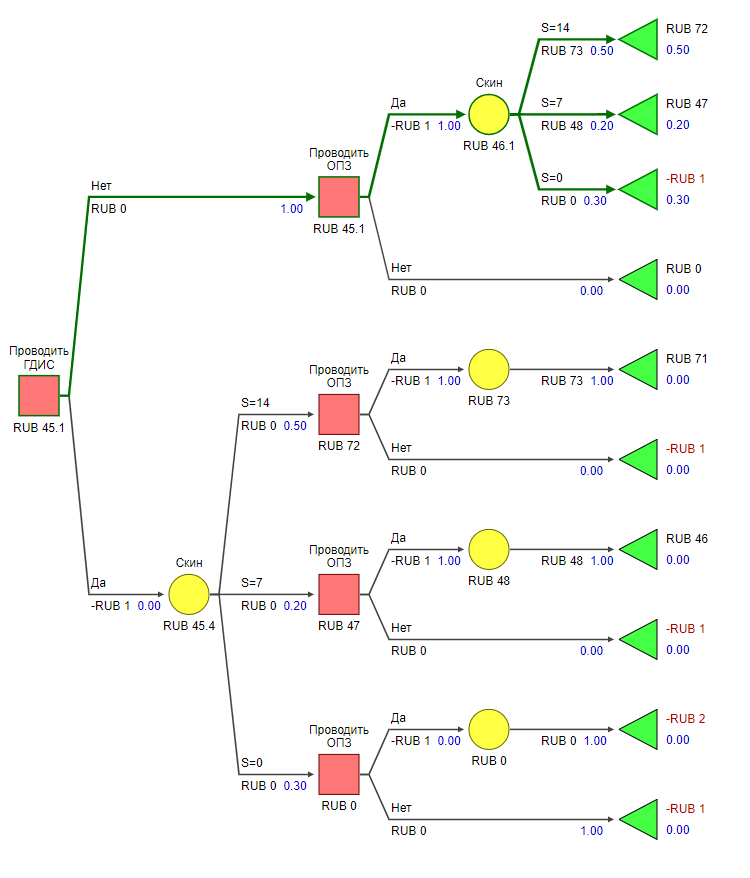

Надо подставить вместо цифр расчетные формулы 
и нарисовать графики 
- зависимости EMV, VOI от стоимости ОПЗ
- зависимости EMV, VOI от стоимости ГДИС
- зависимости EMV, VOI от вероятности наличия скин-фактора (средний скин и дисперсия)

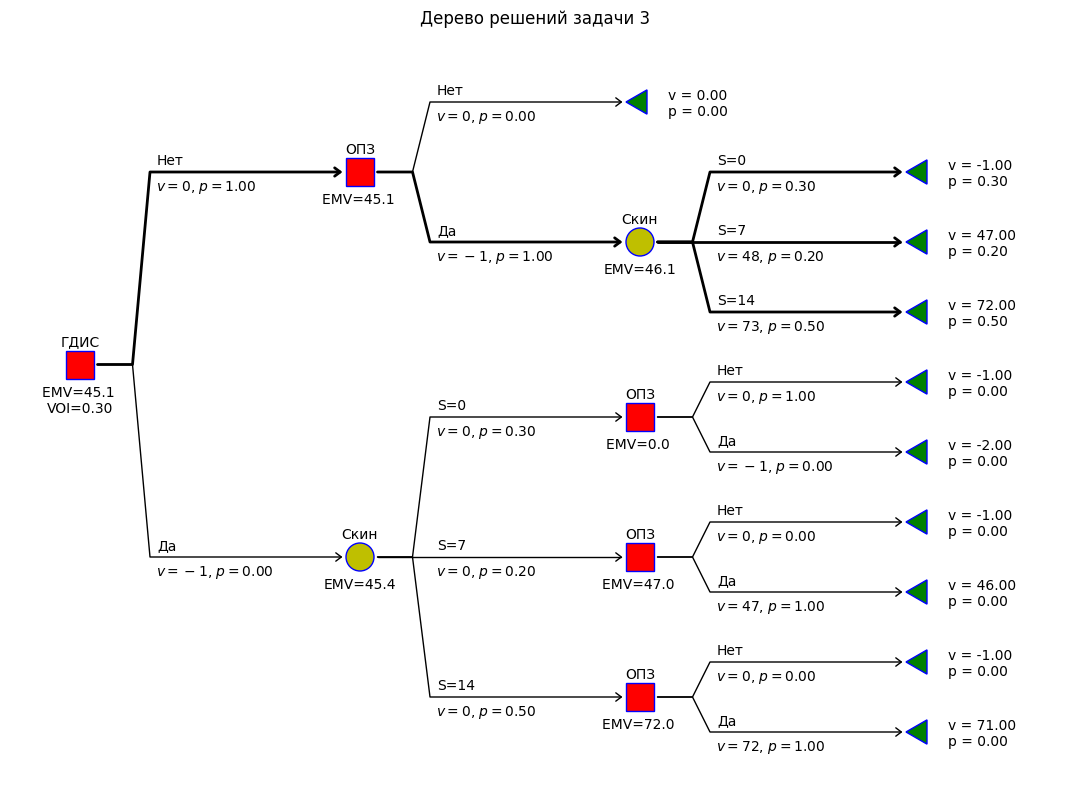

In [13]:
# загрузим дерево из файла tree_3.json
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)
# запуск расчета дерева
dtreevoi.solve_tree(tree)
# нарисуем дерево
fig, ax = plt.subplots(figsize=(15, 10))
dtreevoi.plot_tree(tree, ax, 4, 3)
plt.title('Дерево решений задачи 3')
plt.show()